# Library

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Data preparation

In [25]:
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=0)
    radio_data = get_column(data, 1)

    # get newspaper (index=0)
    newspaper_data = get_column(data, 2)

    # get sales (index=0)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X , y

In [27]:
X, y = prepare_data("advertising.csv")

In [29]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0, sigma=0.01)
    w2 = random.gauss(mu=0, sigma=0.01)
    w3 = random.gauss(mu=0, sigma=0.01)
    
    return [0, -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]
    # return (bias, w1, w2, w3)

In [31]:
def predict(X_features, weights):
    result = 0
    for x, w in zip(X_features, weights):
        result += x*w
    return result

def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = []
    for x in X_features:
        dl_dw = 2*x*(y_hat - y)
        dl_dweights.append(dl_dw)
    return dl_dweights

def update_weights(weights, dl_dweights, lr):
    for i in range(len(weights)):
        weights[i] -= lr*dl_dweights[i]
    return weights

In [33]:
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)
    
    for epoch in range(epoch_max):
        total_loss = 0
        for i in range(N):
            features_i = X_feature[i]
            y = y_output[i]
            
            y_hat = predict(features_i, weights)
            
            loss = compute_loss(y, y_hat)
            total_loss += loss
            
            dl_dweights = compute_gradient_w(features_i, y, y_hat)
            
            weights = update_weights(weights, dl_dweights, lr)
            
            losses.append(loss)
        
        if ((epoch + 1) % 1000 == 0):
            print(f"Epoch: {epoch + 1}, Loss: {total_loss / N}")
        
    return weights, losses

In [35]:
X, y = prepare_data("advertising.csv")
W, L = implement_linear_regression(X, y, epoch_max=5000, lr=1e-5)

Epoch: 1000, Loss: 6.194930093625081
Epoch: 2000, Loss: 5.344875980962622
Epoch: 3000, Loss: 5.1496145494667225
Epoch: 4000, Loss: 5.127325188355508
Epoch: 5000, Loss: 5.141792463684308


In [37]:
def visualize_linear_regression(losses):
    plt.plot(losses[0:100])
    plt.xlabel("#iteration")
    plt.ylabel("Loss")
    plt.show()

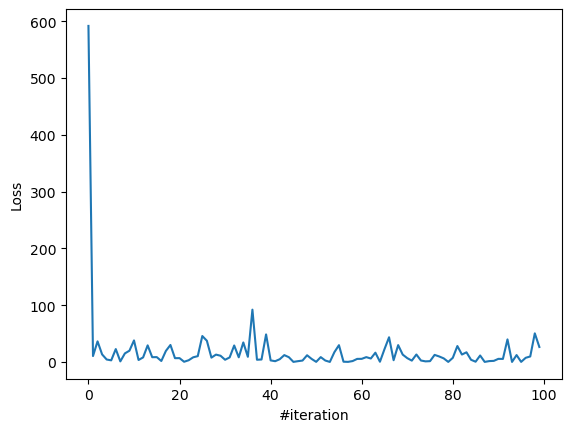

In [39]:
visualize_linear_regression(L)

In [41]:
print(L[9999])

31.339223408109948


Q12: a) 31.33